In [291]:
binary = True

In [292]:

n_iter_DecisionTreeClassifier=50
n_iter_RandomForestClassifier=50
n_iter_GradientBoostingClassifier=50
n_iter_XGBClassifier=50

# Modelos de Classificação

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [294]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate, train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [295]:
ind_vars = pd.read_csv(r'..\code_metrics_professor_util.csv', index_col='question')
ind_vars = ind_vars.fillna(0)

ind_vars

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
1018,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,1,1,2,1,1,1.00
1019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
1020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
1021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75


In [296]:

dep_vars = pd.read_csv(r'Correlations_CSV\question_info.csv', index_col='question')

dep_vars = dep_vars.fillna(0)
dep_vars

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
question,,,,,,,,,,,
1002,3.645161,0.230088,4.193548,7.838710,2.806452,326.806452,38.322581,223.469538,169.903226,22.58,0.03
1018,3.483871,0.250000,7.419355,10.903226,2.612903,600.096774,73.645161,376.824519,287.645161,20.00,-0.01
1019,5.481481,0.162162,6.518519,12.000000,4.592593,605.000000,76.925926,292.271250,365.925926,17.24,-0.01
1020,5.357143,0.160000,12.857143,18.214286,4.500000,945.607143,136.714286,248.957875,456.285714,22.58,0.01
1021,2.680000,0.358209,7.800000,10.480000,1.720000,685.720000,101.680000,391.484083,289.280000,22.22,0.02
...,...,...,...,...,...,...,...,...,...,...,...
6834,2.526316,0.354167,7.105263,9.631579,1.631579,1171.842105,45.684211,74.967941,321.894737,25.00,0.06
6835,1.551724,0.600000,7.517241,9.068966,0.620690,772.793103,36.517241,0.000000,194.482759,21.21,0.09
6836,4.647059,0.189873,9.470588,14.117647,3.764706,1386.882353,61.647059,22.958867,479.529412,16.67,0.07


In [297]:
ind_vars = ind_vars.astype(np.float64)
dep_vars = dep_vars.astype(np.float64)

In [298]:
dep_vars['taxa de erro'].describe()

count    711.000000
mean      28.159831
std       18.214923
min        0.000000
25%       14.290000
50%       25.000000
75%       39.255000
max       95.240000
Name: taxa de erro, dtype: float64

In [299]:
# Função para classificação ternária
def ternary_classify(rows, bounds, reverse=False):
    if len(bounds) != 2:
        raise Exception('quartiles must have 2 values, {} were given'.format(len(bounds)))
        
    values = ('facil', 'medio', 'dificil')
    if reverse:
        values = values[::-1]
    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1] if row <= bounds[1] else
                      values[2]
                     )
    
def get_bounds_ternary(rows, column_name):
    if column_name == 'taxa de erro':
        # Classificação do INEP
        q1 = 20.0  # Primeiro quartil
        q3 = 40.0  # Terceiro quartil
        return (q1, q3)
    else:
        return np.quantile(rows, q=[1/3, 2/3], method='midpoint')

In [300]:
# Classificação binária
def binary_classify(rows, bounds, reverse=False, custom_labels=None):
    """
    Função de classificação binária com rótulos padrão opcionais.
    
    :param rows: Dados a serem classificados
    :param bounds: Limites de classificação
    :param reverse: Se deve inverter as classificações
    :param custom_labels: Lista com dois rótulos alternativos, caso necessário
    :return: Série com classificação
    """
    if len(bounds) != 1:
        raise Exception('bounds deve conter exatamente 1 valor, {} foram fornecidos'.format(len(bounds)))
        
    # Rótulos padrão ou personalizados
    values = custom_labels if custom_labels else ('facil', 'dificil')
    
    if reverse:
        values = values[::-1]
    
    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1]
                     )
    
def get_bounds_binary(rows, column_name):
    if column_name == 'taxa de erro':
        # Classificação do INEP
        return (40.0,)
    elif column_name == 'discriminacao':
        # Classificação do INEP
        return (0.09,)
    else:
        return np.quantile(rows, q=[0.5], method='midpoint')

In [301]:
classified = pd.DataFrame(index=dep_vars.index, columns=dep_vars.columns)
bounds = {}

for col in classified.columns:
    if col == 'discriminacao':
        # Lógica binária para 'discriminacao'
        bounds[col] = get_bounds_binary(dep_vars[col], col)
        classified[col] = binary_classify(dep_vars[col], bounds[col], reverse=False, custom_labels=('facil', 'dificil'))
 
    else:
        if binary:  # Usa lógica binária para outras colunas se binary = True
            bounds[col] = get_bounds_binary(dep_vars[col], col)
            classified[col] = binary_classify(dep_vars[col], bounds[col], reverse=False)
        else:  # Usa lógica ternária para outras colunas se binary = False
            bounds[col] = get_bounds_ternary(dep_vars[col], col)
            classified[col] = ternary_classify(dep_vars[col], bounds[col])

# Resultado final
classified


,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
question,,,,,,,,,,,
1002,dificil,facil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1018,facil,dificil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1019,dificil,facil,facil,facil,dificil,facil,facil,dificil,dificil,facil,facil
1020,dificil,facil,dificil,dificil,dificil,facil,dificil,dificil,dificil,facil,facil
1021,facil,dificil,facil,facil,facil,facil,dificil,dificil,facil,facil,facil
...,...,...,...,...,...,...,...,...,...,...,...
6834,facil,dificil,facil,facil,facil,dificil,facil,facil,facil,facil,facil
6835,facil,dificil,facil,facil,facil,facil,facil,facil,facil,facil,facil
6836,dificil,facil,facil,facil,dificil,dificil,facil,facil,dificil,facil,facil


In [302]:
classified['discriminacao'].value_counts()

discriminacao
facil      573
dificil    138
Name: count, dtype: int64

In [303]:
classified['taxa de erro'].value_counts()

taxa de erro
facil      540
dificil    171
Name: count, dtype: int64

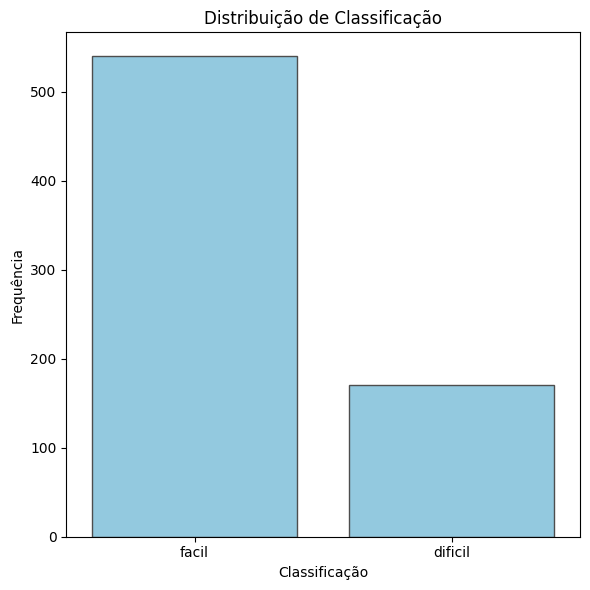

In [304]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de carregamento dos dados (use seu DataFrame real)
# classified = pd.read_csv('seu_arquivo.csv')

# Contando a frequência de todas as categorias na coluna 'taxa de erro'
unique_dificuldade = classified['taxa de erro'].value_counts()

# Criar diretório para salvar o gráfico
caminho = r'Figures\Classification'
os.makedirs(caminho, exist_ok=True)

# Criar o gráfico
plt.figure(figsize=(6, 6))  # Ajuste o tamanho do gráfico
sns.barplot(
    x=unique_dificuldade.index,
    y=unique_dificuldade.values,
    edgecolor=".3",  # Bordas nas barras
    color="skyblue"  # Cor única
)
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.title('Distribuição de Classificação')

# Salvar o gráfico
fig_name = "Classificacao_TaxaDeErro.png"
plt.tight_layout()
plt.savefig(os.path.join(caminho, fig_name))

# Mostrar o gráfico
plt.show()


In [305]:
classified

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
question,,,,,,,,,,,
1002,dificil,facil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1018,facil,dificil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1019,dificil,facil,facil,facil,dificil,facil,facil,dificil,dificil,facil,facil
1020,dificil,facil,dificil,dificil,dificil,facil,dificil,dificil,dificil,facil,facil
1021,facil,dificil,facil,facil,facil,facil,dificil,dificil,facil,facil,facil
...,...,...,...,...,...,...,...,...,...,...,...
6834,facil,dificil,facil,facil,facil,dificil,facil,facil,facil,facil,facil
6835,facil,dificil,facil,facil,facil,facil,facil,facil,facil,facil,facil
6836,dificil,facil,facil,facil,dificil,dificil,facil,facil,dificil,facil,facil


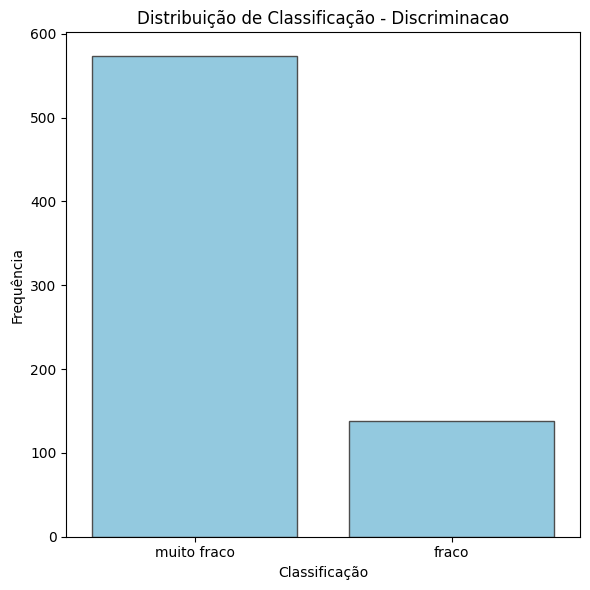

In [306]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de carregamento dos dados (use seu DataFrame real)
# classified = pd.read_csv('seu_arquivo.csv')

# Configuração binária ou ternária

# Reordenando e filtrando as categorias
ordem_desejada = ["facil", "dificil"]
grafico = classified[classified['discriminacao'].isin(ordem_desejada)]  # Filtrar apenas categorias desejadas
grafico['discriminacao'] = pd.Categorical(grafico['discriminacao'], categories=ordem_desejada, ordered=True)

# Renomeando as categorias conforme desejado
rename_map = {"facil": "muito fraco", "dificil": "fraco"}
grafico['discriminacao'] = grafico['discriminacao'].map(rename_map)

# Contando as frequências corretamente
unique_dificuldade = grafico['discriminacao'].value_counts().sort_index()

# Criar diretório para salvar o gráfico
caminho = r'Figures\Classification\2' if binary else r'Figures\Classification\3'
os.makedirs(caminho, exist_ok=True)

# Configurar os rótulos para binário ou ternário
xtick_labels = unique_dificuldade.index  # Agora com os nomes renomeados

# Criar o gráfico
plt.figure(figsize=(6, 6))  # Ajuste o tamanho do gráfico
sns.barplot(
    x=unique_dificuldade.index,
    y=unique_dificuldade.values,
    edgecolor=".3",  # Bordas nas barras
    color="skyblue"  # Cor única
)
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels)
plt.title('Distribuição de Classificação - Discriminacao')

# Salvar o gráfico
fig_name = "Classificacao_Discriminacao.png"
plt.tight_layout()
plt.savefig(os.path.join(caminho, fig_name))

# Mostrar o gráfico
plt.show()



rename_map = { "muito fraco":"facil",  "fraco":"dificil"}
grafico['discriminacao'] = grafico['discriminacao'].map(rename_map)


In [307]:
classified

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
question,,,,,,,,,,,
1002,dificil,facil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1018,facil,dificil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1019,dificil,facil,facil,facil,dificil,facil,facil,dificil,dificil,facil,facil
1020,dificil,facil,dificil,dificil,dificil,facil,dificil,dificil,dificil,facil,facil
1021,facil,dificil,facil,facil,facil,facil,dificil,dificil,facil,facil,facil
...,...,...,...,...,...,...,...,...,...,...,...
6834,facil,dificil,facil,facil,facil,dificil,facil,facil,facil,facil,facil
6835,facil,dificil,facil,facil,facil,facil,facil,facil,facil,facil,facil
6836,dificil,facil,facil,facil,dificil,dificil,facil,facil,dificil,facil,facil


In [308]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro','f1_micro']

In [309]:
encoder = LabelEncoder()
#classes = ['facil', 'dificil'] if binary else ['facil', 'medio', 'dificil']
classes =  ['facil', 'medio', 'dificil']
encoder.fit(classes)

LabelEncoder()

In [310]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np


def cross_val_train(ind_vars, y, model, binary_class, is_encoded):
    """
    Função de validação cruzada ajustada com lógica específica para 'discriminacao' e a escolha de classes
    em função do parâmetro `binary_class`.
    """
    predicted_list = np.array([], dtype=int)
    tested_list = np.array([], dtype=int)
    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(ind_vars, y):
        X_train, X_test = ind_vars.iloc[train_index], ind_vars.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplicar oversampling apenas para a coluna 'taxa de erro'
        if y.name == 'taxa de erro':
            oversample = SMOTE(random_state=42)
            X_train, y_train = oversample.fit_resample(X_train, y_train)

        # Ajustar o modelo com os dados de treino
        model.fit(X_train, y_train)

        # Fazer previsões
        y_pred = model.predict(X_test)

        # Armazenar previsões e dados reais
        tested_list = np.append(tested_list, y_test)
        predicted_list = np.append(predicted_list, y_pred)

    # Descodificar previsões caso seja necessário
    if is_encoded:
        tested_list = encoder.inverse_transform(tested_list)
        predicted_list = encoder.inverse_transform(predicted_list)

    # Lógica para definir as classes usadas na métrica
    if y.name == 'discriminacao':
        # Sempre usar apenas as classes 'facil' e 'dificil' para discriminacao
        classes = ('facil', 'dificil')
        
    else:
        # Caso contrário, determinar as classes dependendo de binary_class
        classes = ('facil', 'dificil') if binary_class else ('facil', 'medio', 'dificil')

    try:
        # Calcular a matriz de confusão com as classes apropriadas
        cnf_matrix = confusion_matrix(tested_list, predicted_list, labels=classes)
    except ValueError as e:
        raise ValueError(
            f"Erro ao calcular a matriz de confusão.\n"
            f"Variável 'y_true' (tested_list): {np.unique(tested_list)}\n"
            f"Variável 'y_pred' (predicted_list): {np.unique(predicted_list)}\n"
            f"Classes esperadas: {classes}\n"
            f"Mensagem original: {str(e)}"
        )

    # Calcular as métricas de desempenho
    precision, recall, f1_macro, _ = precision_recall_fscore_support(
        tested_list, predicted_list, average='macro'
    )
    
    # Cálculo adicional da métrica f1_micro
    precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
        tested_list, predicted_list, average='micro'
    )
    
    acc = accuracy_score(tested_list, predicted_list)

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,  # Incluindo f1_micro nos resultados
    }, cnf_matrix




In [311]:
def model_train_search_cv(ind_vars, dep_vars, model, model_class, distributions, n_iter, train_type=cross_val_train,
                           binary_class=False, encode=False):
    scoring = ['accuracy', 'precision', 'recall', 'f1_macro', 'f1_micro']  # Adicionei 'f1_micro' aqui
    results = pd.DataFrame(index=dep_vars.columns, columns=scoring)
    cnf_matrixes = dict()
    
    for metric in results.index:
        pipeline_ls = []
        if metric == 'taxa de erro':
            pipeline_ls.append(("smote", SMOTE()))
        pipeline_ls.append(("model", model))

        pipe_distributions = {f'model__{key}': value for key, value in distributions.items()}
        pipeline = Pipeline(pipeline_ls)
        
        ndf = pd.Series(encoder.transform(dep_vars[metric]), name=metric, dtype=int) if encode else dep_vars[metric]
        cross_val = StratifiedKFold(n_splits=4, shuffle=True)

        # Mantendo a lógica do search com a métrica f1_macro
        clf = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=pipe_distributions,
            random_state=42,
            cv=cross_val,
            n_iter=n_iter,
            n_jobs=-1,
            scoring='f1_macro',
            return_train_score=True,
        )
        
        # Realiza a busca no modelo
        search = clf.fit(ind_vars, ndf)
        best_params = {key.split('__')[-1]: value for key, value in search.best_params_.items()}
        print('best params for {}: {}'.format(metric, best_params))
        best_model = model_class(**best_params)

        # Rodando a função de validação cruzada ajustada
        metric_train_result, cnf_matrix = train_type(ind_vars, ndf, best_model, binary_class, is_encoded=encode)
        
        # Salvando resultados na tabela
        results.loc[metric] = metric_train_result
        cnf_matrixes[metric] = cnf_matrix

    return results.sort_values(by=['f1_micro'], ascending=False), cnf_matrixes

## Matriz de Confusão

In [312]:
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cnf_matrix, title,  base_dir="Figures", regression_dir="Classification", discriminacao=False):
    """
    Plota a matriz de confusão, exibe o gráfico e o salva em uma pasta específica baseada no valor de `binary` e `discriminacao`.

    Parameters:
        cnf_matrix (array-like): A matriz de confusão.
        title (str): O título do gráfico.
        binary (bool): Define a subpasta e o nome do arquivo. True -> Regression/2, False -> Regression/3.
        base_dir (str): O diretório base para salvar os gráficos. Padrão é "Figures".
        regression_dir (str): O subdiretório base "Regression".
        discriminacao (bool): Define se as classes são 'dificil' e 'facil'. Substitui o valor de `binary` se True.
    """
    # Configurar as classes com base nos parâmetros
    if discriminacao:
        classes = ['muito fraco', 'fraco']
        sub_dir = os.path.join(regression_dir, "discriminacao")
        file_name = "matriz_confusao_discriminacao.png"
    else:
        classes = ['fácil', 'difícil'] if binary else ['fácil', 'médio', 'difícil']
        sub_dir = os.path.join(regression_dir, "2" if binary else "3")
        file_name = f"matriz_confusao_{'2' if binary else '3'}.png"

    # Criar o caminho completo
    full_sub_dir = os.path.join(base_dir, sub_dir)
    os.makedirs(full_sub_dir, exist_ok=True)
    
    file_path = os.path.join(full_sub_dir, file_name)

    # Configurar o estilo e criar o gráfico
    plt.figure()
    plt.style.use('default')
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    # Configurar os ticks e rótulos
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Adicionar valores na matriz
    fmt = 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe predita')
    plt.xlabel('Classe verdadeira')

    # Salvar o gráfico no arquivo especificado
    plt.savefig(file_path, bbox_inches='tight')

    # Informar onde o arquivo foi salvo
    print(f"Gráfico salvo em: {file_path}")

    plt.show()


## Experimentos

In [313]:
def push_best_results(best_results, df_results: pd.DataFrame, model):
    for dep_var, metrics in df_results.iterrows():
        acc_cur, f1_cur, _ = best_results[dep_var]
        acc_nxt, f1_nxt = df_results.loc[dep_var, ['accuracy', 'f1_macro']]  # Removendo f1_micro
        if f1_nxt > f1_cur or (np.abs(f1_nxt - f1_cur) < 1e-6 and acc_nxt > acc_cur):
            best_results[dep_var] = acc_nxt, f1_nxt, model


In [314]:
columns = dep_vars.columns
best_results = dict()
for col in columns:
    best_results[col] = (0.0, 0.0, '')

### Árvore de Decisão

In [315]:
from sklearn.tree import DecisionTreeClassifier

In [316]:
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
random_state = [42, 0, 7, 21, 15,19,12,4,17] 
distributions = dict(criterion=criterion, splitter=splitter, random_state=random_state)

In [317]:
ind_vars

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1018,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.00
1019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0.0,4.0,4.0,8.0,1.0,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0.0,4.0,4.0,8.0,1.0,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0.0,4.0,4.0,8.0,1.0,4.75


In [318]:
classified

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
question,,,,,,,,,,,
1002,dificil,facil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1018,facil,dificil,facil,facil,facil,facil,facil,dificil,facil,facil,facil
1019,dificil,facil,facil,facil,dificil,facil,facil,dificil,dificil,facil,facil
1020,dificil,facil,dificil,dificil,dificil,facil,dificil,dificil,dificil,facil,facil
1021,facil,dificil,facil,facil,facil,facil,dificil,dificil,facil,facil,facil
...,...,...,...,...,...,...,...,...,...,...,...
6834,facil,dificil,facil,facil,facil,dificil,facil,facil,facil,facil,facil
6835,facil,dificil,facil,facil,facil,facil,facil,facil,facil,facil,facil
6836,dificil,facil,facil,facil,dificil,dificil,facil,facil,dificil,facil,facil


In [319]:
tree = DecisionTreeClassifier()
scores, cnf_matrixes_dt = model_train_search_cv(ind_vars, classified, tree, DecisionTreeClassifier, distributions, n_iter_DecisionTreeClassifier, binary_class=binary)
push_best_results(best_results, scores, 'Árvore de Decisão')
scores

best params for num_submissoes: {'splitter': 'random', 'random_state': 4, 'criterion': 'entropy'}
best params for taxa_aceitacao: {'splitter': 'random', 'random_state': 19, 'criterion': 'gini'}
best params for num_testes: {'splitter': 'random', 'random_state': 4, 'criterion': 'gini'}
best params for num_consultas: {'splitter': 'random', 'random_state': 7, 'criterion': 'gini'}
best params for num_erros: {'splitter': 'random', 'random_state': 7, 'criterion': 'log_loss'}
best params for num_eventos: {'splitter': 'random', 'random_state': 0, 'criterion': 'entropy'}
best params for num_eventos_del: {'splitter': 'random', 'random_state': 7, 'criterion': 'gini'}
best params for tempo_implementacao: {'splitter': 'random', 'random_state': 19, 'criterion': 'log_loss'}
best params for qtd_alteracoes_codigo: {'splitter': 'random', 'random_state': 15, 'criterion': 'gini'}
best params for taxa de erro: {'splitter': 'random', 'random_state': 12, 'criterion': 'entropy'}
best params for discriminacao: 

,accuracy,precision,recall,f1_macro,f1_micro
discriminacao,0.866385,0.784016,0.823583,0.800786,0.866385
taxa de erro,0.786217,0.713322,0.73538,0.722351,0.786217
tempo_implementacao,0.762307,0.762556,0.762328,0.76226,0.762307
qtd_alteracoes_codigo,0.749648,0.751952,0.749715,0.749108,0.749648
num_eventos,0.71308,0.714218,0.713028,0.712666,0.71308
taxa_aceitacao,0.703235,0.703502,0.703209,0.70312,0.703235
num_eventos_del,0.694796,0.696717,0.694865,0.694097,0.694796
num_erros,0.683544,0.684993,0.683723,0.683053,0.683544
num_submissoes,0.656821,0.657237,0.656856,0.656625,0.656821
num_consultas,0.656821,0.659071,0.656904,0.655676,0.656821


### Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier

In [321]:
n_estimators = np.linspace(start=100, stop=1000, num=10, dtype=int)
criterion = ['gini', 'entropy', 'log_loss']
class_weight = ['balanced', 'balanced_subsample', None]
random_state = [42]
distributions = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    class_weight=class_weight,
    random_state=random_state
)

In [322]:
rd_forest = RandomForestClassifier()


scores, cnf_matrixes_rf = model_train_search_cv(ind_vars, classified, rd_forest, RandomForestClassifier, distributions, n_iter_RandomForestClassifier, binary_class=binary)
push_best_results(best_results, scores, 'Random Forest')
scores

best params for num_submissoes: {'random_state': 42, 'n_estimators': np.int64(700), 'criterion': 'log_loss', 'class_weight': None}
best params for taxa_aceitacao: {'random_state': 42, 'n_estimators': np.int64(100), 'criterion': 'gini', 'class_weight': 'balanced'}
best params for num_testes: {'random_state': 42, 'n_estimators': np.int64(100), 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}
best params for num_consultas: {'random_state': 42, 'n_estimators': np.int64(700), 'criterion': 'log_loss', 'class_weight': None}
best params for num_erros: {'random_state': 42, 'n_estimators': np.int64(500), 'criterion': 'gini', 'class_weight': 'balanced'}
best params for num_eventos: {'random_state': 42, 'n_estimators': np.int64(600), 'criterion': 'log_loss', 'class_weight': 'balanced_subsample'}
best params for num_eventos_del: {'random_state': 42, 'n_estimators': np.int64(100), 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
best params for tempo_implementacao: {'random_st

,accuracy,precision,recall,f1_macro,f1_micro
discriminacao,0.893108,0.828315,0.831911,0.830093,0.893108
taxa de erro,0.811533,0.74213,0.744055,0.74308,0.811533
tempo_implementacao,0.773558,0.77356,0.773556,0.773557,0.773558
qtd_alteracoes_codigo,0.769339,0.769644,0.769362,0.769284,0.769339
num_eventos,0.73699,0.738803,0.736928,0.736456,0.73699
taxa_aceitacao,0.711674,0.712718,0.711624,0.711288,0.711674
num_eventos_del,0.710267,0.71051,0.71029,0.710198,0.710267
num_erros,0.703235,0.703275,0.703259,0.703233,0.703235
num_consultas,0.683544,0.683796,0.683569,0.683454,0.683544
num_submissoes,0.677918,0.677919,0.677916,0.677916,0.677918


Gráfico salvo em: Figures\Classification\2\matriz_confusao_2.png


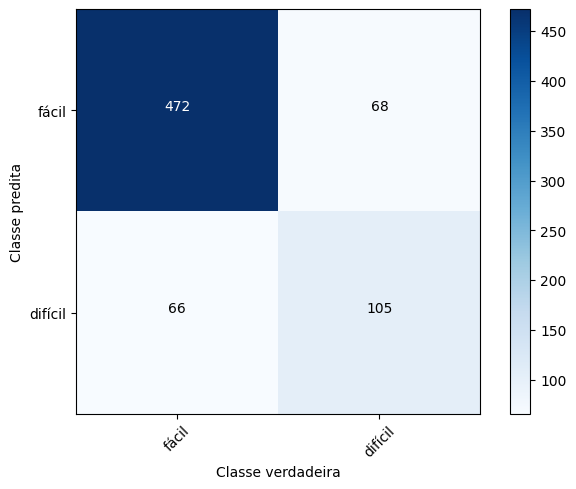

In [323]:
plot_confusion_matrix(cnf_matrixes_rf['taxa de erro'], '')

Gráfico salvo em: Figures\Classification\discriminacao\matriz_confusao_discriminacao.png


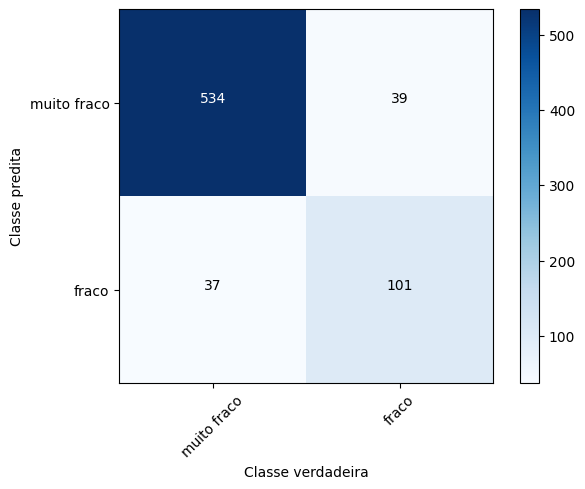

In [324]:
plot_confusion_matrix(cnf_matrixes_rf['discriminacao'], '',discriminacao=True)

### GradientBoosting

In [325]:
from sklearn.ensemble import GradientBoostingClassifier

In [326]:
gboost = GradientBoostingClassifier()

In [327]:
loss = ['log_loss']
if binary:
    loss = ['log_loss', 'exponential']

learning_rate = np.linspace(start=0.01, stop=0.5, num=10)
n_estimators = np.linspace(start=1, stop=500, num=10, dtype=int)
criterion = ['friedman_mse', 'squared_error']
random_state = [42]

distributions = dict(
    loss = loss,
    learning_rate = learning_rate,
    n_estimators = n_estimators,
    criterion = criterion,
    random_state=random_state,
)

In [328]:
scores, cnf_matrixes_gb = model_train_search_cv(ind_vars, classified, model=gboost, model_class=GradientBoostingClassifier, distributions=distributions, n_iter=n_iter_GradientBoostingClassifier, binary_class=binary)
push_best_results(best_results, scores, 'Gradient Boosting')
scores

best params for num_submissoes: {'random_state': 42, 'n_estimators': np.int64(500), 'loss': 'log_loss', 'learning_rate': np.float64(0.01), 'criterion': 'squared_error'}
best params for taxa_aceitacao: {'random_state': 42, 'n_estimators': np.int64(222), 'loss': 'exponential', 'learning_rate': np.float64(0.22777777777777777), 'criterion': 'friedman_mse'}
best params for num_testes: {'random_state': 42, 'n_estimators': np.int64(333), 'loss': 'exponential', 'learning_rate': np.float64(0.5), 'criterion': 'squared_error'}
best params for num_consultas: {'random_state': 42, 'n_estimators': np.int64(111), 'loss': 'log_loss', 'learning_rate': np.float64(0.5), 'criterion': 'squared_error'}
best params for num_erros: {'random_state': 42, 'n_estimators': np.int64(56), 'loss': 'log_loss', 'learning_rate': np.float64(0.5), 'criterion': 'friedman_mse'}
best params for num_eventos: {'random_state': 42, 'n_estimators': np.int64(111), 'loss': 'exponential', 'learning_rate': np.float64(0.1733333333333333

,accuracy,precision,recall,f1_macro,f1_micro
discriminacao,0.886076,0.819946,0.811044,0.815367,0.886076
taxa de erro,0.803094,0.731744,0.742495,0.736717,0.803094
tempo_implementacao,0.786217,0.786446,0.786196,0.786165,0.786217
qtd_alteracoes_codigo,0.770745,0.771003,0.770767,0.7707,0.770745
num_eventos,0.735584,0.736847,0.735532,0.735202,0.735584
taxa_aceitacao,0.714487,0.715231,0.714445,0.714213,0.714487
num_eventos_del,0.697609,0.697967,0.697638,0.697492,0.697609
num_consultas,0.68917,0.690634,0.689231,0.688616,0.68917
num_submissoes,0.684951,0.68664,0.684883,0.684185,0.684951
num_erros,0.684951,0.685345,0.68504,0.684845,0.684951


### Extreme Gradient Boosting

In [329]:
xgb = XGBClassifier()

In [330]:
n_estimators = np.linspace(start=100, stop=500, num=10, dtype=int)
max_depth = np.linspace(start=3, stop=15, num=15, dtype=int)
eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsample = np.linspace(start=0.1, stop=1.0, num=10, dtype=np.float64)
random_state = [42]

distributions = dict(n_estimators=n_estimators, max_depth=max_depth, eta=eta, subsample=subsample, random_state=random_state)
distributions

{'n_estimators': array([100, 144, 188, 233, 277, 322, 366, 411, 455, 500]),
 'max_depth': array([ 3,  3,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 13, 14, 15]),
 'eta': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'random_state': [42]}

In [331]:
scores, cnf_matrixes_xgb = model_train_search_cv(ind_vars, classified, model=xgb, model_class=XGBClassifier, distributions=distributions, n_iter=n_iter_XGBClassifier, binary_class=binary, encode=True)
push_best_results(best_results, scores, 'Extreme Gradient Boosting')
scores

best params for num_submissoes: {'subsample': np.float64(0.7000000000000001), 'random_state': 42, 'n_estimators': np.int64(188), 'max_depth': np.int64(9), 'eta': 0.1}
best params for taxa_aceitacao: {'subsample': np.float64(0.7000000000000001), 'random_state': 42, 'n_estimators': np.int64(188), 'max_depth': np.int64(9), 'eta': 0.1}
best params for num_testes: {'subsample': np.float64(0.7000000000000001), 'random_state': 42, 'n_estimators': np.int64(500), 'max_depth': np.int64(5), 'eta': 1.0}
best params for num_consultas: {'subsample': np.float64(0.5), 'random_state': 42, 'n_estimators': np.int64(233), 'max_depth': np.int64(9), 'eta': 0.1}
best params for num_erros: {'subsample': np.float64(0.30000000000000004), 'random_state': 42, 'n_estimators': np.int64(411), 'max_depth': np.int64(9), 'eta': 0.01}
best params for num_eventos: {'subsample': np.float64(0.9), 'random_state': 42, 'n_estimators': np.int64(411), 'max_depth': np.int64(11), 'eta': 0.1}
best params for num_eventos_del: {'sub

,accuracy,precision,recall,f1_macro,f1_micro
discriminacao,0.887482,0.819421,0.822919,0.82115,0.887482
taxa de erro,0.814346,0.746096,0.751901,0.748892,0.814346
tempo_implementacao,0.78903,0.789064,0.789037,0.789026,0.78903
qtd_alteracoes_codigo,0.762307,0.762772,0.762336,0.762214,0.762307
num_eventos,0.721519,0.724071,0.721443,0.720679,0.721519
taxa_aceitacao,0.720113,0.720738,0.720074,0.719891,0.720113
num_eventos_del,0.71308,0.713517,0.713111,0.712952,0.71308
num_erros,0.708861,0.70893,0.708814,0.708803,0.708861
num_consultas,0.706048,0.70708,0.706097,0.705713,0.706048
num_submissoes,0.675105,0.675119,0.675111,0.675103,0.675105


In [332]:
best_results

{'num_submissoes': (0.6849507735583685,
  0.6841854783698462,
  'Gradient Boosting'),
 'taxa_aceitacao': (0.720112517580872,
  0.7198908776313002,
  'Extreme Gradient Boosting'),
 'num_testes': (0.6821378340365682, 0.6821321749038598, 'Gradient Boosting'),
 'num_consultas': (0.7060478199718706,
  0.7057125033419481,
  'Extreme Gradient Boosting'),
 'num_erros': (0.7088607594936709,
  0.7088031561806889,
  'Extreme Gradient Boosting'),
 'num_eventos': (0.7369901547116737, 0.7364563119304971, 'Random Forest'),
 'num_eventos_del': (0.7130801687763713,
  0.7129524080934739,
  'Extreme Gradient Boosting'),
 'tempo_implementacao': (0.7890295358649789,
  0.7890257798034468,
  'Extreme Gradient Boosting'),
 'qtd_alteracoes_codigo': (0.770745428973277,
  0.7707000698427647,
  'Gradient Boosting'),
 'taxa de erro': (0.8143459915611815,
  0.7488923136197265,
  'Extreme Gradient Boosting'),
 'discriminacao': (0.8931082981715893, 0.8300925693012025, 'Random Forest')}

In [333]:
best_results_df = pd.DataFrame(best_results, index=['f1_micro', 'accuracy', 'classificador']) \
    .T.sort_values(by=['f1_micro', 'accuracy'], ascending=False)
best_results_df

,f1_micro,accuracy,classificador
discriminacao,0.893108,0.830093,Random Forest
taxa de erro,0.814346,0.748892,Extreme Gradient Boosting
tempo_implementacao,0.78903,0.789026,Extreme Gradient Boosting
qtd_alteracoes_codigo,0.770745,0.7707,Gradient Boosting
num_eventos,0.73699,0.736456,Random Forest
taxa_aceitacao,0.720113,0.719891,Extreme Gradient Boosting
num_eventos_del,0.71308,0.712952,Extreme Gradient Boosting
num_erros,0.708861,0.708803,Extreme Gradient Boosting
num_consultas,0.706048,0.705713,Extreme Gradient Boosting
num_submissoes,0.684951,0.684185,Gradient Boosting


In [334]:
pasta = "Classification_CSV/3" if not binary else "Classification_CSV/2"
os.makedirs(pasta, exist_ok=True)

caminho = os.path.join(pasta, "results_classification.csv")

best_results_df.to_csv(caminho, index=False)

Gráfico salvo em: Figures\Classification\2\matriz_confusao_2.png


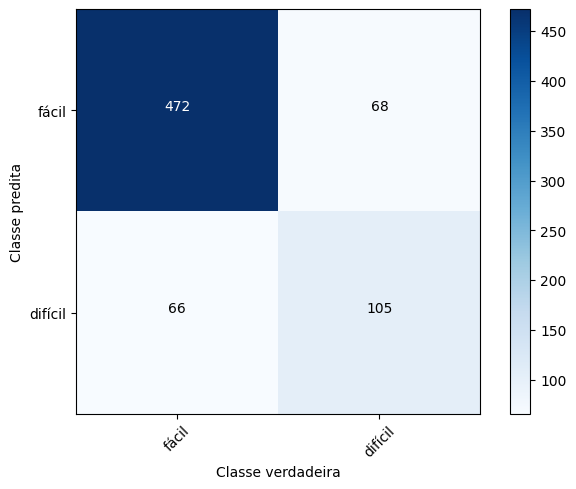

In [335]:
plot_confusion_matrix(cnf_matrixes_rf['taxa de erro'], '')

Gráfico salvo em: Figures\Classification\discriminacao\matriz_confusao_discriminacao.png


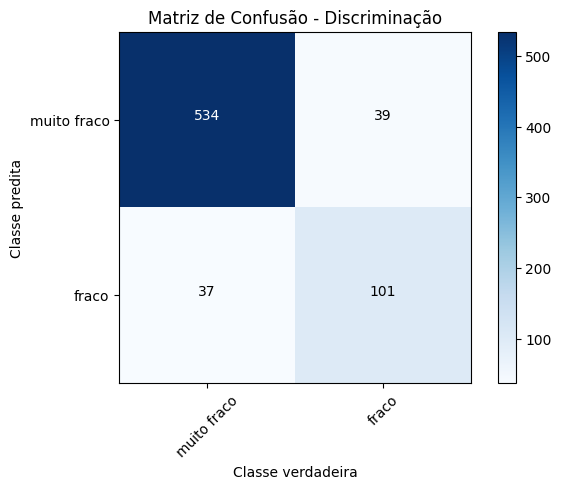

In [336]:
plot_confusion_matrix(cnf_matrixes_rf['discriminacao'], 'Matriz de Confusão - Discriminação', discriminacao=True)

## Reduzindo número de variáveis independentes

In [337]:

caminho=r'Correlations_CSV\best_code_metrics.csv'






best_code_metrics = pd.read_csv(caminho, index_col='metric')
code_attrs = pd.DataFrame(index=best_code_metrics.index, columns=best_code_metrics.columns)
for row in best_code_metrics.iterrows():
    cols = row[1].apply(lambda item: eval(item)[1])
    code_attrs.loc[row[0],:] = cols
code_attrs

,1,2,3,4,5,6,7,8,9,10
metric,,,,,,,,,,
num_submissoes,builtin_func_unique,greater_eq,identifiers_max_len,star,less,builtin_func,identifiers_mean_len,encoding,minus,blank_lines
taxa_aceitacao,greater_eq,builtin_func_unique,identifiers_max_len,identifiers_mean_len,minus,string,greater,number_float,less,multi_comments
num_testes,identifier,h1,rpar,lpar,number_int,effort,time,equal,minus,difficulty
num_consultas,minus,greater_eq,identifier,lpar,rpar,h1,equal,time,effort,string
num_erros,builtin_func_unique,greater_eq,identifiers_max_len,less,star,identifiers_mean_len,builtin_func,minus,encoding,number_float
num_eventos,identifier,complexity,sloc,indent,dedent,colon,keyword,lloc,newline,eq_equal
num_eventos_del,identifier,sloc,lloc,newline,equal,string,greater_eq,N2,volume,bugs
tempo_implementacao,builtin_type_unique,identifiers_max_len,builtin_func_unique,kwd_print,identifiers_mean_len,number_float,builtin_type,identifiers_min_len,difficulty,kwd_input
qtd_alteracoes_codigo,identifier,lloc,sloc,newline,equal,volume,bugs,N2,N,N1


## Selecionando métricas mais comuns

In [338]:
attrs = {}
for row in code_attrs.iterrows():
    for key in row[1]:
        if not key in attrs:
            attrs[key] = 0
        attrs[key] += 1
best_attrs = list(attrs.items())
best_attrs.sort(key=lambda key: key[1], reverse=True)
best_attrs = list(map(lambda x: x[0], best_attrs[:10]))
best_attrs

['identifier',
 'greater_eq',
 'minus',
 'equal',
 'builtin_func_unique',
 'identifiers_max_len',
 'less',
 'identifiers_mean_len',
 'string',
 'number_float']

In [339]:
filtered_classified = ind_vars[best_attrs] 
filtered_classified

,identifier,greater_eq,minus,equal,builtin_func_unique,identifiers_max_len,less,identifiers_mean_len,string,number_float
question,,,,,,,,,,
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1018,2.0,0.0,0.0,2.0,1.0,1.0,0.0,1.00,2.0,0.0
1019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6834,17.0,0.0,0.0,3.0,4.0,8.0,1.0,4.75,3.0,3.0
6835,17.0,0.0,0.0,3.0,4.0,8.0,1.0,4.75,3.0,3.0
6836,17.0,0.0,0.0,3.0,4.0,8.0,1.0,4.75,3.0,3.0
